# **INDUSTRIA DEL VIDEOJUEGO**

La motivación de este reporte es dar una visión histórica y actual de la industria del gaming. Podemos establecer su origen en la década de los años 40, tras la Segunda Guerra Mundial cuando se comenzaron a crear los primeros ordenadores. Desde entonces es una industria que año tras año ha ido ganando tamaño hasta llegar en 2023 a unas cifras superiores a los 360 billones de dólares. En España supera la cifra de los 2.000 millones de euros.

Puede encontrar un resumen más detallado y por etapas de la historia de la industria del videojuego [aquí](https://www.fib.upc.edu/retro-informatica/historia/videojocs.html).
Enlace de interés ([gráficas](https://helplama.com/game-industry-usage-revenue-statistics/#:~:text=vs%20Entertainment%20Industry-,Key%20Gaming%20Industry%20Statistics%202023,billion%20of%20revenue%20in%202021.)).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lo primero se realiza es la importación de las distintas librerías, pese a que no se vayan a utilizar todas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A continuación, se introducen los distintos datasets a través de los cuales, se realizará el análisis de los datos. El primero de ellos, muestra las consolas que se han ido lanzando por las compañías desde los años 70, pese a que la industria del videojuego comenzase a mitad del siglo XX.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entregable_1/best-selling game consoles.csv')
df.head()

Console Name      Type   Company  Released Year  Discontinuation Year  \
0    PlayStation 2      Home      Sony           2000                  2013   
1      Nintendo DS  Handheld  Nintendo           2004                  2013   
2  Nintendo Switch    Hybrid  Nintendo           2017                     0   
3         Game Boy  Handheld  Nintendo           1989                  2003   
4   Game Boy Color  Handheld  Nintendo           1998                  2003   

   Units sold (million)                                            Remarks  
0                155.00           Final sales are greater than 155 million  
1                154.02                                                NaN  
2                122.55                                                NaN  
3                 64.42  The Game Boy (1989) and the Game Boy Color (19...  
4                 44.06                                                NaN

In [ ]:

console_names = ["PlayStation 2", "Nintendo DS", "Nintendo Switch", "Game Boy", "Game Boy Color",
                 "PlayStation 4", "PlayStation", "Wii", "PlayStation 3", "Xbox 360",
                 "Game Boy Advance", "PlayStation Portable", "Nintendo 3DS", "NES/Famicom",
                 "Xbox One", "SNES/Super Famicom", "Game & Watch", "Nintendo 64",
                 "Sega Genesis/Mega Drive", "PlayStation 5", "Atari 2600", "Xbox",
                 "GameCube", "Xbox Series X/S", "Wii U", "PlayStation Vita",
                 "Sega Master System", "Sega Game Gear", "PC Engine/TurboGrafx-16", "Sega Saturn",
                 "Dreamcast", "Master System(Brazilian variants)", "Dendy(Famiclone)",
                 "Super NES Classic Edition", "Famicom Disk System", "NES Classic Edition",
                 "WonderSwan", "Sega Pico", "Color TV-Game", "Intellivision",
                 "Mega Drive(Brazilian variants)", "N-Gage", "Sega CD", "ColecoVision",
                 "Magnavox Odyssey", "PC Engine CD-ROM", "Atari 7800", "Atari Lynx",
                 "Philips CD-i", "Telstar", "Atari 5200"]

console_types = ["Home", "Handheld", "Hybrid", "Handheld", "Handheld",
                 "Home", "Home", "Home", "Home", "Home",
                 "Handheld", "Handheld", "Handheld", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Home", "Home", "Home", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Handheld", "Home", "Handheld", "Home",
                 "Home", "Home", "Dedicated", "Home console add-on",
                 "Dedicated", "Handheld", "Home console add-on", "Dedicated",
                 "Dedicated", "Home", "Handheld", "Home",
                 "Handheld", "Home console add-on", "Home", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Handheld", "Home", "Home", "Dedicated",
                 "Home"]

console_companies = ["Sony", "Nintendo", "Nintendo", "Nintendo", "Nintendo",
                     "Sony", "Sony", "Nintendo", "Sony", "Microsoft",
                     "Nintendo", "Sony", "Nintendo", "Nintendo",
                     "Microsoft", "Nintendo", "Nintendo", "Nintendo",
                     "Sega", "Sony", "Atari", "Microsoft",
                     "Nintendo", "Microsoft", "Nintendo", "Sony",
                     "Sega", "Sega", "NEC/Hudson Soft", "Sega",
                     "Sega", "Tectoy", "Micro Genius", "Nintendo",
                     "Nintendo", "Nintendo", "Bandai", "Sega",
                     "Nintendo", "Mattel", "Tectoy", "Nokia",
                     "Sega", "Coleco", "Magnavox/Philips", "NEC",
                     "Atari", "Atari", "Philips", "Coleco",
                     "Atari"]

released_years = [2000, 2004, 2017, 1989, 1998,
                  2013, 1994, 2006, 2006, 2005,
                  2001, 2004, 2011, 1983, 2013,
                  1990, 1980, 1996, 1988, 2020,
                  1977, 2001, 2012, 2011, 1986,
                  1990, 1987, 1994, 1998, 1989,
                  1992, 2017, 1986, 1992, 2018,
                  1986, 1998, 1977, 1980, 1990,
                  2003, 1991, 1982, 1978, 1988,
                  1986, 1989, 1990, 1998, 1976,
                  1982]

discontinuation_years = [2013, 2013, 0, 2003, 2003,
                         0, 2006, 2013, 2017, 2016,
                         2010, 2014, 2020, 2003, 2020,
                         2003, 1991, 2002, 1997, 0,
                         1992, 2009, 2007, 2017, 2019,
                         1996, 1997, 1994, 2000, 1996,
                         1998, 2018, 1992, 2018, 0,
                         1996, 1998, 1980, 1990, 1998,
                         2005, 1996, 1985, 1975, 1998,
                         1991, 1995, 1, 1, 1,
                         1, 1984]

units_sold_million = [155.00, 154.02, 122.55, 64.42, 44.06,
                      117.20, 102.49, 101.63, 87.40, 84.00,
                      81.51, 82.00, 75.94, 61.91, 58.50,
                      49.10, 43.40, 32.93, 30.75, 30.00,
                      30.00, 24.00, 21.74, 18.50, 13.56,
                      15.00, 13.00, 10.62, 10.00, 9.26,
                      9.13, 8.00, 6.00, 5.28, 4.50,
                      3.56, 3.50, 3.40, 3.00, 3.00,
                      3.00, 3.00, 3.00, 2.24, 2.00,
                      2.00, 1.92, 1.00, 1.00, 1.00,
                      1.00, 1.00]





### SITUACIÓN HISTÓRICA DEL MERCADO

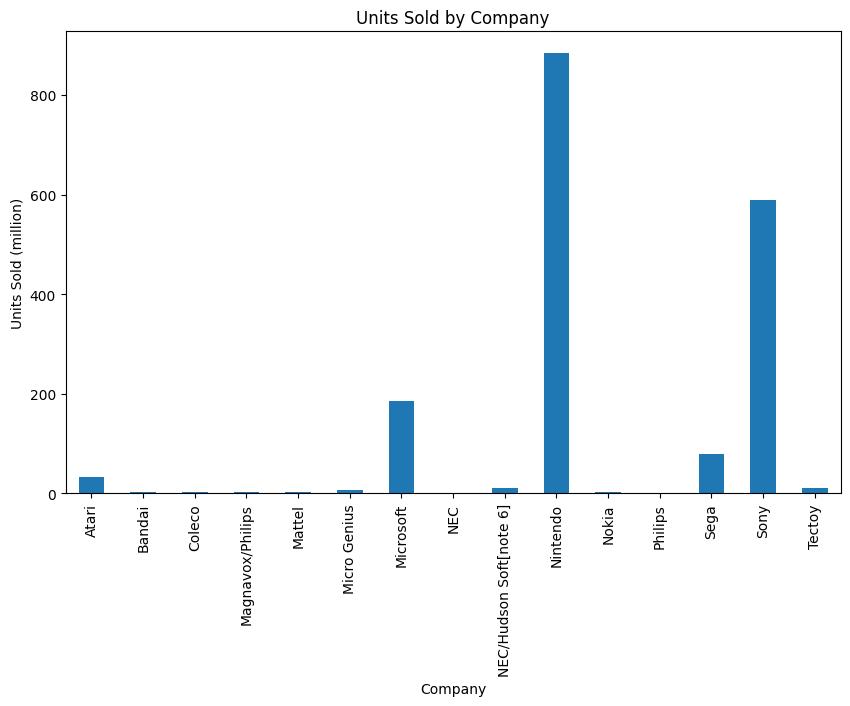

In [ ]:

company_units_sold = df.groupby('Company')['Units sold (million)'].sum()

company_units_sold.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Units Sold (million)')
plt.title('Units Sold by Company')
plt.show()

Como puede observarse en la gráfica anterior, el **TOP 3 mundial** de compañías que han puesto a la venta consolas han sido: **Nintendo** (800 millones), **Sony** (600 millones aprox) y **Microsoft** (200 millones).

**Nintendo** se posiciona en primer lugar ya que fue de las **primeras** compañías que comenzó a **desarrollar consolas** - comenzando con la NES en 1983 - la cual causó furor entre los amantes de esta nueva tecnología. Hasta el día de hoy, esta compañía ha lanzado al mercado más de 10 consolas distribuidas en sobremesa y portátiles. La consola más vendida por la compañía fue la Nintendo DS lanzada en 2004.

**Sony**, con su aclamada **PlayStation**, pese a situarse en segundo lugar a nivel de ventas, es muy probable que sea la **consola más conocida** a nivel mundial gracias a tecnologías, lanzamientos exclusivos y estrategias de marketing implementadas. Sin duda alguna, la PlayStation 2, lanzada con la entrada del nuevo milenio marcó un antes y un después en la industria convirtiendose en la consola más vendida a nivel mundial (+155 millones).

Por último, **Microsoft** se hace con el último escalón del podio gracias a sus Xbox. Siempre han sido superadas por compañías como Sony o Nintendo en ventas, pero últimamente con la **compra de grandes estudios** como [Activision Blizzard](https://www.xataka.com/videojuegos/activision-blizzard-microsoft-su-principal-atractivo-tardara-llegar-a-game-pass), está **ganando cuota de mercado**.

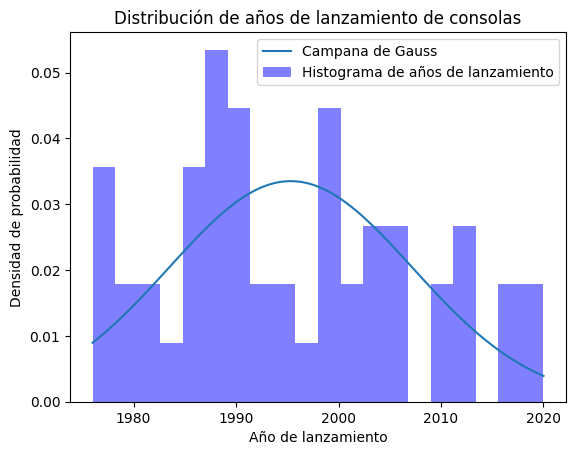

In [ ]:
released_years = [2000, 2004, 2017, 1989, 1998, 2013, 1994, 2006, 2006, 2005,
                  2001, 2004, 2011, 1983, 2013, 1990, 1980, 1996, 1988, 2020,
                  1977, 2001, 2012, 2011, 1986, 1990, 1987, 1994, 1998, 1989,
                  1992, 2017, 1986, 1992, 2018, 1986, 1998, 1977, 1980, 1990,
                  2003, 1991, 1982, 1978, 1988, 1986, 1989, 1990, 1998, 1976, 1982]

# Calcular media y desviación estándar
mu = np.mean(released_years)
sigma = np.std(released_years)

# Crear datos
x = np.linspace(min(released_years), max(released_years), 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Visualizar la campana de Gauss
plt.plot(x, y, label='Campana de Gauss')
plt.hist(released_years, bins=20, density=True, alpha=0.5, color='blue', label='Histograma de años de lanzamiento')
plt.title('Distribución de años de lanzamiento de consolas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


Teniendo en cuenta los años de lanzamiento de las consolas estudiadas, se puede realizar una **Campana de Gauss** para conocer mejor en qué momento las compañías exprimieron al máximo sus recusos para poder lanzar consolas al mercado. La **media** se encuentra entorno al **año 1995**. Esto se debe, principalmente, al rápido crecimiento tecnológico que se experimentaba y en la mejora de experiencia y calidad en las videoconsolas y videojuegos. Compañías como **Sega, Nintendo y Sony** fueron las principales **artífices** de los lanzamientos en la década de los 90 destacando la **Dreamcast, GameBoy y GameBoy Color** y, por último la **PlayStation**.

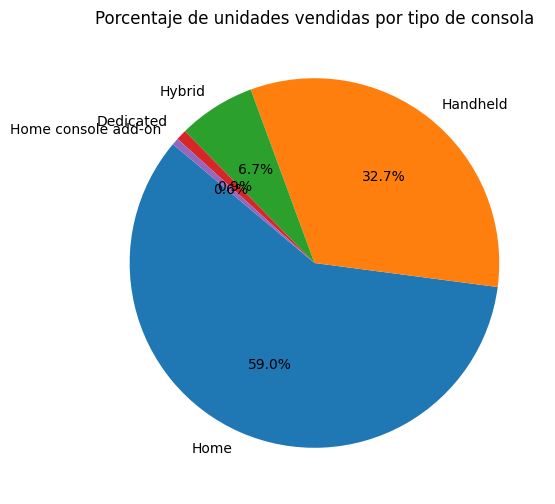

In [ ]:
import matplotlib.pyplot as plt

# Variables
console_types = ["Home", "Handheld", "Hybrid", "Handheld", "Handheld",
                 "Home", "Home", "Home", "Home", "Home",
                 "Handheld", "Handheld", "Handheld", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Home", "Home", "Home", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Handheld", "Home", "Handheld", "Home",
                 "Home", "Home", "Dedicated", "Home console add-on",
                 "Dedicated", "Handheld", "Home console add-on", "Dedicated",
                 "Dedicated", "Home", "Handheld", "Home",
                 "Handheld", "Home console add-on", "Home", "Home",
                 "Home", "Home", "Handheld", "Home",
                 "Handheld", "Home", "Home", "Dedicated",
                 "Home"]

units_sold_million = [155.00, 154.02, 122.55, 64.42, 44.06,
                      117.20, 102.49, 101.63, 87.40, 84.00,
                      81.51, 82.00, 75.94, 61.91, 58.50,
                      49.10, 43.40, 32.93, 30.75, 30.00,
                      30.00, 24.00, 21.74, 18.50, 13.56,
                      15.00, 13.00, 10.62, 10.00, 9.26,
                      9.13, 8.00, 6.00, 5.28, 4.50,
                      3.56, 3.50, 3.40, 3.00, 3.00,
                      3.00, 3.00, 3.00, 2.24, 2.00,
                      2.00, 1.92, 1.00, 1.00, 1.00,
                      1.00, 1.00]

# Crear un diccionario para agrupar las ventas por tipo de consola
sales_by_type = {}

for console, sales in zip(console_types, units_sold_million):
    if console in sales_by_type:
        sales_by_type[console] += sales
    else:
        sales_by_type[console] = sales

# Obtener las etiquetas y los valores para el gráfico circular
labels = list(sales_by_type.keys())
values = list(sales_by_type.values())

# Calcular los porcentajes
total_unidades = sum(values)
porcentajes = [(unidad / total_unidades) * 100 for unidad in values]

# Crear el gráfico circular
plt.figure(figsize=(7, 6))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de unidades vendidas por tipo de consola')
plt.show()


En el gráfico visto anteriormente, podemos observar el "Porcentaje de unidades vendidas por tipos de consola". El **mercado** mayoritariamente se **divide** entre las **consolas de casa** (PlayStation, Xbox, Nintendo 64) o aquellas **portátiles** (GameBoy, Nintendo DS, PlayStation Portable: PSP); pero desde hace un tiempo relativamente corto, **comienza** a crecer una nueva tipología de consola. Un **modelo híbrido** que comparte portabilidad y juego en casa (Nintendo Switch en 2017 y [PlayStation Portal](https://as.com/meristation/reportajes/analisis-de-playsation-portal-el-complemento-perfecto-para-ps5-n/) en 2023). Cabe destacar de estas últimas que no tienen la capacidad ni rendimiento de las consolas "Home".

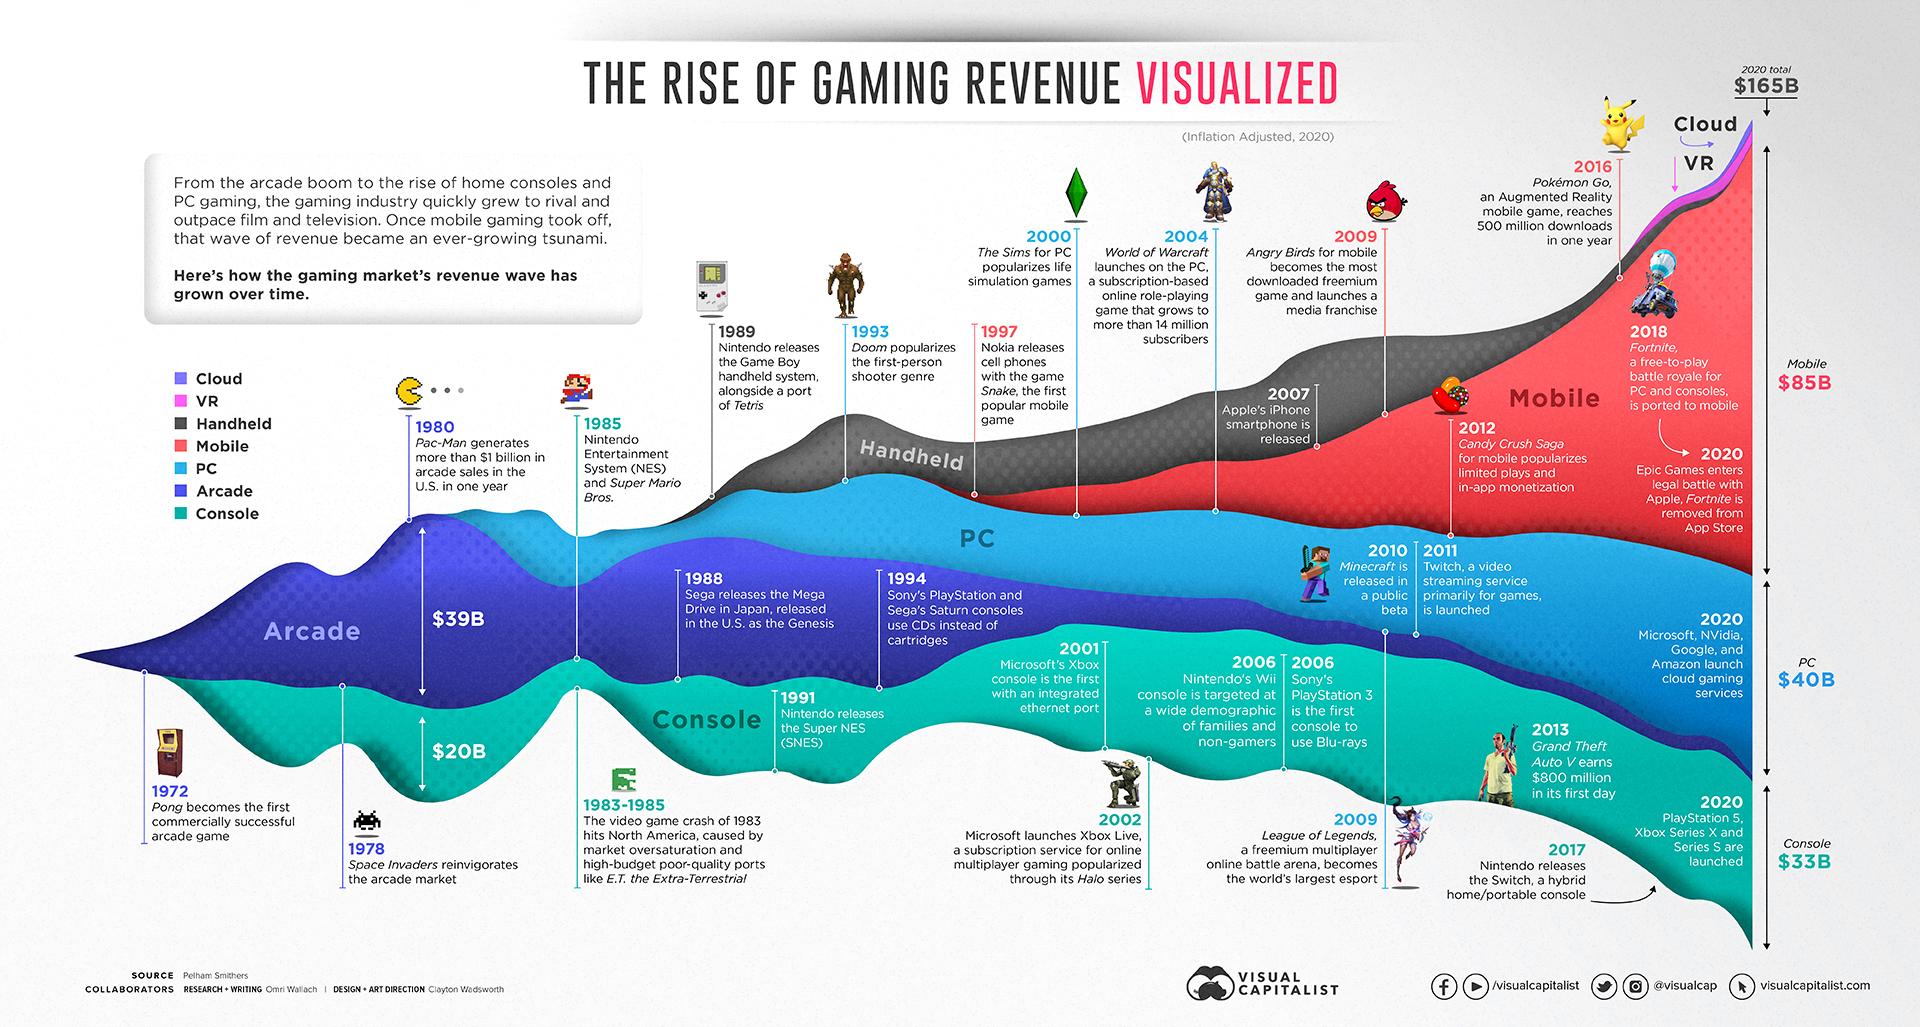

### VIDEOJUEGOS Y COMPETITIVO

En esta sección del reporte, se ilustrará en **cifras y gráficamente** el mundo de los videojuegos llevándolo al terreno doméstico y haciendo una brece comparación con el mundo profesional. Los **eSports**.

En las últimas dos décadas han ido ganando popularidad hasta ser un mercado que **genera más de 360 billones** de dólares al año.

Estos pueden ser jugados de forma individual o en equipos. Existe una amplia variedad en los géneros de videojuegos, desde los Shooters, pasando por la estrategia e incluso deportes.

In [ ]:
# Juegos lanzados y sus ventas. De este dataset extraeremos genero y ventas globales.
import pandas as pd
dfd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entregable_1/dato.csv')
dfd.head(10)


Platform     Genre               Publisher NA_Sales EU_Sales JP_Sales  \
0      Wii    Sports                Nintendo    41,36    28,96     3,77   
1      Wii    Racing                Nintendo    15,68     12,8     3,79   
2      Wii    Sports                Nintendo    15,61    10,95     3,28   
3       DS  Platform                Nintendo    11,28     9,15      6,5   
4      Wii      Misc                Nintendo    13,96     9,18     2,93   
5      Wii  Platform                Nintendo    14,48     6,95      4,7   
6       DS    Racing                Nintendo     9,71     7,48     4,13   
7      Wii    Sports                Nintendo     8,92     8,03      3,6   
8     X360      Misc  Microsoft Game Studios    15,02     4,91     0,24   
9      Wii    Sports                Nintendo     9,01     8,49     2,53   

  Other_Sales Global_Sales Rating Critic_Score_Class  
0        8,45        82,54      E              Bueno  
1        3,29        35,57      E          Excelente  
2        2,95        32,78      E          Excelente  
3        2,88        29,81      E          Excelente  
4        2,84        28,92      E               Malo  
5        2,25        28,38      E          Excelente  
6         1,9        23,22      E          Excelente  
7        2,15         22,7      E          Excelente  
8        1,69        21,86      E          Aceptable  
9        1,77        21,79      E          Excelente

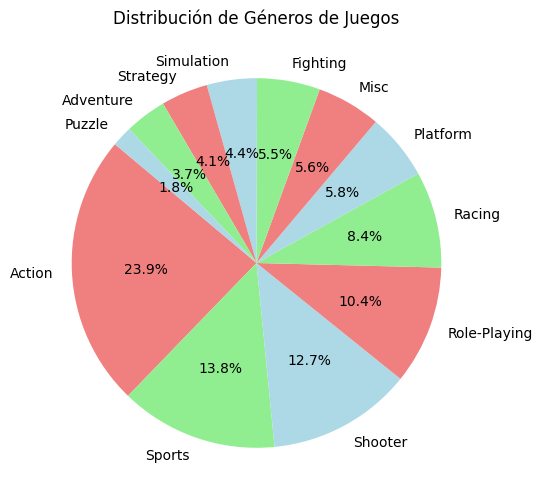

In [ ]:
genres = dfd['Genre'].value_counts()

plt.figure(figsize=(7, 6))
plt.pie(genres, labels=genres.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribución de Géneros de Juegos')
plt.show()

Como se puede observar en el gráfico anterior, los **jugadores** que lo hacen desde sus **casas** destacan principalmente por disfrutar su tiempo frente a la consola en los juegos de **acción**, **deportes**, **shooters**, **role-playing** o **racing**. Luego existen grupos más pequeños de géneros que se encuentran muy por debajo de los porcentajes de los anteriores.

In [ ]:
# Dataset basado en los primeros 50 videojuegos competitivos más conocidos (Juego, Genero, Total Dinero Ganado, Jugadores profesionales)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entregable_1/ESport_Earnings_mod.csv', delimiter=';')
df.head()

IdNo   TotalMoney                          GameName  \
0   231  227419904,5                            Dota 2   
1   245  102474261,3  Counter-Strike: Global Offensive   
2   534     97508425                          Fortnite   
3   164  79003448,94                 League of Legends   
4   151  33914062,96                      StarCraft II   

                             Genre  PlayerNo  TournamentNo  \
0  Multiplayer Online Battle Arena      3836          1434   
1             First-Person Shooter     13032          5252   
2                    Battle Royale      4347           660   
3  Multiplayer Online Battle Arena      7130          2477   
4                         Strategy      2078          5909   

          Top_Country Top_Country_Earnings  Releaseyear  
0               China          65060611,47         2013  
1             Denmark          15379018,34         2012  
2       United States          33422756,37         2017  
3  Korea, Republic of          26739426,14         2009  
4  Korea, Republic of          20635189,05         2010

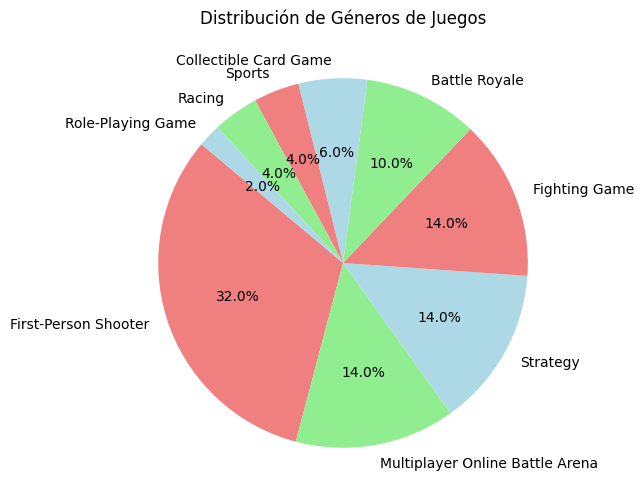

In [ ]:
genres = df['Genre'].value_counts()

plt.figure(figsize=(7, 6))
plt.pie(genres, labels=genres.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribución de Géneros de Juegos')
plt.show()

Teniendo en cuenta el **mundo competitivo de los eSports**, los principales géneros de videojuegos jugados a nivel profesional son los "First Person Shooter", los "MOBA" y en un mismo porcentaje se encuentran: "Strategy", "Fighting Games" y los "Battle Royale".

Los **First Person Shooter** (FPS) son simuladores de uso de armas en primera persona.
Ocupan el 32% del total de los géneros jugados en eSports. Entre ellos podemos encontrar como principales:

*   Counter Strike: Global Offensive: Reune a más de 13000 jugadores profesionales.
*   Call of Duty: 500 jugadores profesionales repartidos en diversas regiones.

Los **Multiplayer Online Battle Arena** (MOBA) son un subgénero de los videojuegos de estrategia en el que en un campo de batalla se reunen los diferentes equipos para luchar por derrotar la base enemiga. Los MOBA más famosos y jugados a nivel competitivo son:

*   League of Leyends (LoL): Más de 7000 jugadores repartidos en las areas: Europa y Asia, principalmente.
*   Dota 2: Cercano a 4000 profesionales que se concentran principalmente en Asia.

Por último, como se nombra anteirormente, se encuentran los juegos de **estrategia**, de **lucha** (plataformas) y los "**Battle Royale**" en un mismo porcentaje. Entre los juegos más destacados de los distintos generos, se encuentra:

*   StarCraft: Estrategia
*   Super Mario Bros: Juegos de lucha (plataformas)
*   Fortnite: Battle Royale
*   Free Fire: Battle Royale


Si se realiza una pequeña comparación entre los jugadores domésticos y aquellos que lo hacen de forma profesional, sí que se encuentran diferencias entre los diferentes géneros.

Por lo general, se prefiere, por parte de los jugadores domésticos los juegos de acción, ya que estos son muy disfrutables y no se pueden jugar de forma competitiva.

El resto de juegos, como: Shooters, MOBA o Battle Royale, al estar dirigidos a la competición mayoritariamente, los jugadores domésticos los juegan mucho menos.

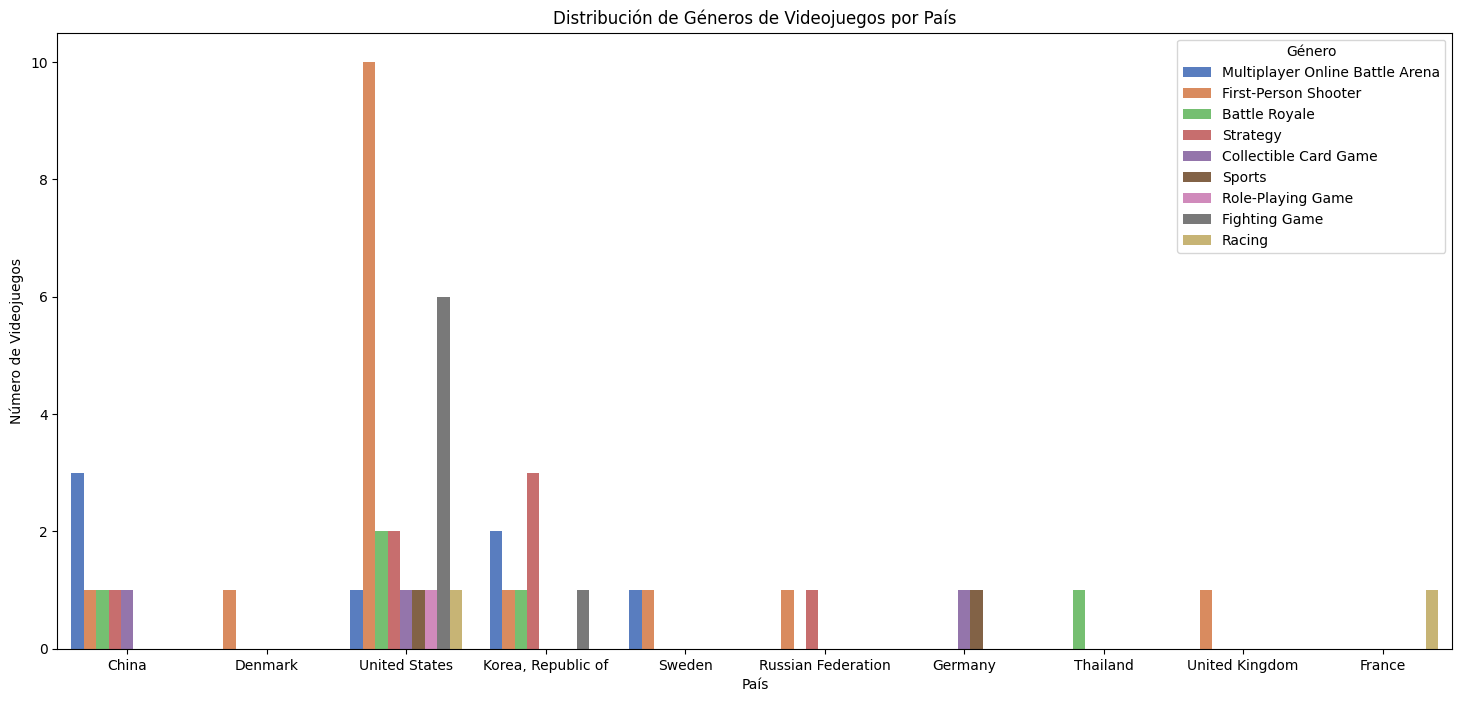

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['Top_Country'].value_counts().head(10).index


df_top_countries_genre = df[df['Top_Country'].isin(top_countries)]

# Crear un gráfico de barras apiladas cruzando Top_Country y Genre
plt.figure(figsize=(18, 8))
sns.countplot(x='Top_Country', hue='Genre', data=df_top_countries_genre, palette='muted')
plt.xlabel('País')
plt.ylabel('Número de Videojuegos')
plt.title('Distribución de Géneros de Videojuegos por País')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.show()


La gráfica anterior nos muestra por país la **tipología de juegos más comunes** en los campeonatos **competitivos**. Se puede observar tres países que aunan los principales géneros más jugados en el mundo de los eSports.

Las **regiones de Asia** (China y Korea del Sur) y **Norte América** (Estados Unidos) son aquellas que tienen una mayor representación en todas las categorías. La región asiática destaca principalmente por su participación en el género MOBA (League of Legends). Por otra parte, la región estadounidense se centra principalmente en juegos First Person Shooter, destacando dentro del mismo Call of Duty y el CSGO.

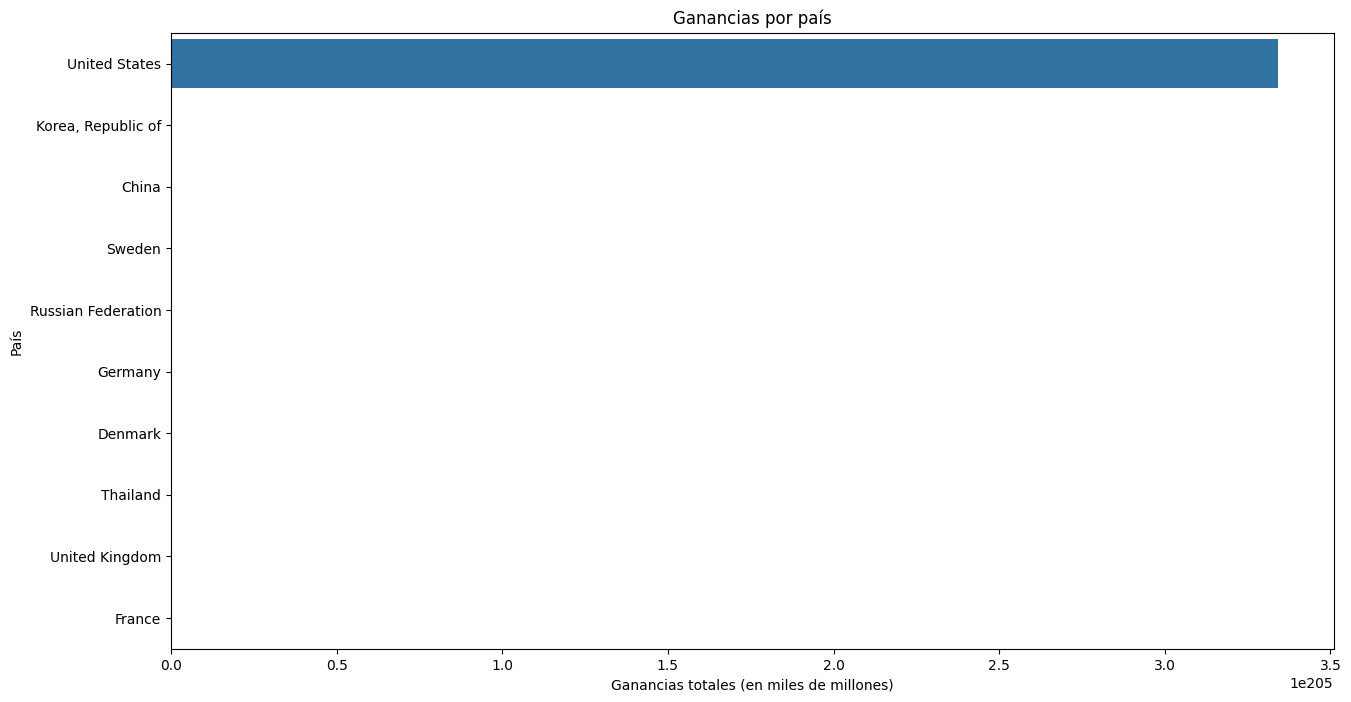

In [ ]:

country_earnings['Top_Country_Earnings'] = pd.to_numeric(country_earnings['Top_Country_Earnings'].str.replace(',', ''), errors='coerce')

country_earnings_sorted = country_earnings.sort_values('Top_Country_Earnings', ascending=False)

# Gráfico de barras para los ingresos totales por país
plt.figure(figsize=(15, 8))
sns.barplot(x='Top_Country_Earnings', y='Top_Country', data=country_earnings_sorted)

plt.title('Ganancias por país')
plt.xlabel('Ganancias totales (en miles de millones)')
plt.ylabel('País')
plt.show()


Por último, el gráfico anterior muestra las ganancias totales por país. Como anteriormente se nombraba en el reporte, las **regiones asiáticas** (Corea del Sur y China) son las que **más dinero mueven** en el mundo profesional de los eSports. Principalmente porque el total de ***prize pool*** de juegos como el LoL o Dota 2 son juegos que tienen muchísimos torneos anualmente.

En el siguiente escalón se encuentra EEUU que, pese a que no suele competir en los mismos videojuegos que regiones como la asiática. Los FPS como el Call of Duty o CSGO generan grandes ***prize pools***.

Si trasladamos el sector de los eSports a la región europea, el país que destaca en ganancias es Dinamarca con el Counter Strike: Global Offensive. Los jugadores daneses, repartidos en los diferentes equipos de la ESL Pro League son los que más dinero generan en el ranking de nacionalidades europeas.

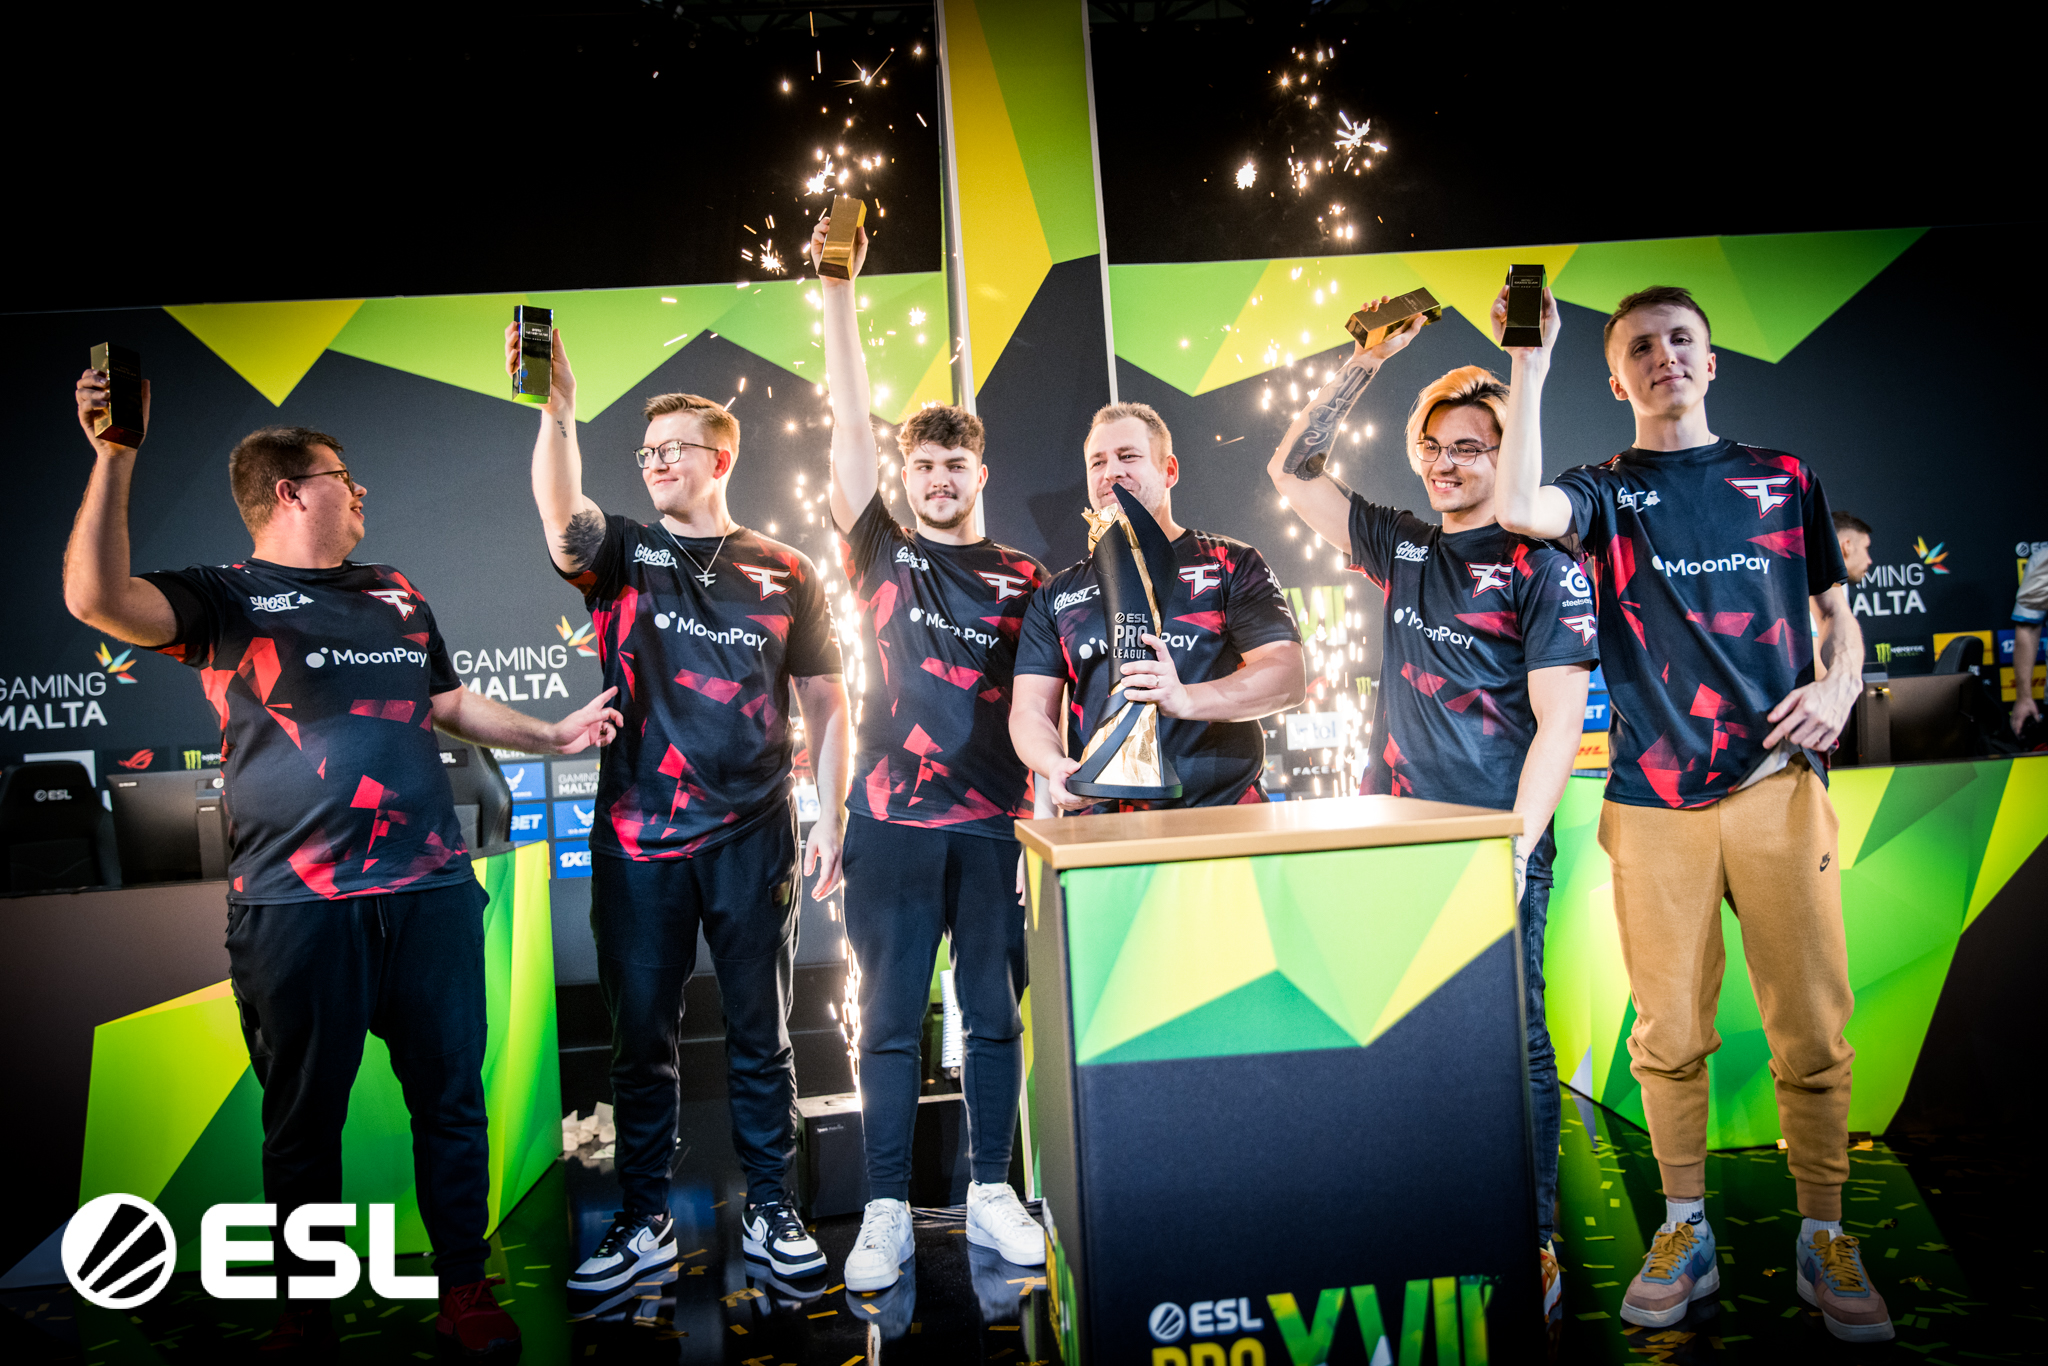

### CONCLUSIÓN


En conclusión, la industria del gaming ha experimentado una gran expansión desde sus inicios en los años 40, alcanzando en 2023 cifras que superan los 360 billones de dólares a nivel mundial.

Nintendo, Sony y Microsoft han liderado el mercado de consolas, marcando hitos significativos a lo largo de las décadas. A día de hoy continúan innovando y mejorando la experiencia de los usuaros.

En el ámbito competitivo, los géneros FPS y MOBA dominan, generando considerables ingresos. A medida que la industria evoluciona, se anticipan nuevas tendencias y un continuo crecimiento en este emocionante sector.